# 01 – Data Exploration & Known Findex Series

Current knowledge (Jan 2026):
- Findex waves (demand-side, adults 15+):
  - 2011: 14%
  - 2014: 22%
  - 2017: 35%
  - 2021: 46%
  - 2024 (Findex 2025 release): 49%
- Digital payment usage (made/received): ~21% in 2024
- Supply-side proxies growing fast (Telebirr users, transactions)

      account_ownership_pct  digital_payment_pct
year                                            
2011                     14                  NaN
2014                     22                  NaN
2017                     35                  NaN
2021                     46                  NaN
2024                     49                 21.0


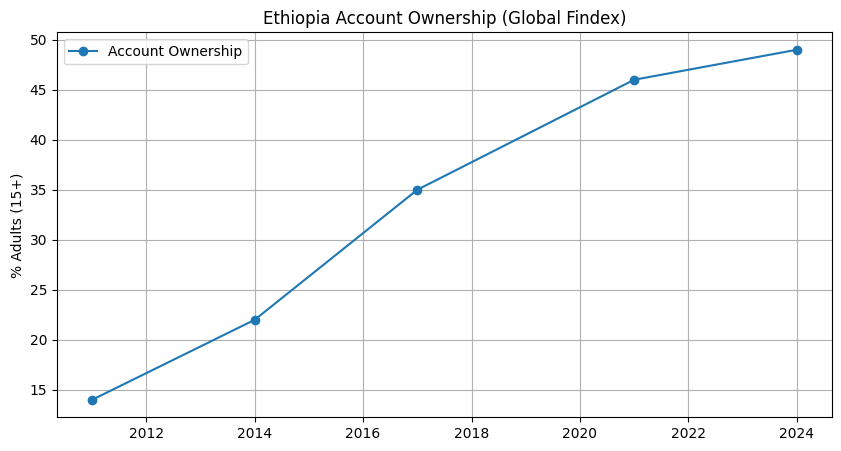

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hard-coded known Findex data (expand with unified dataset later)
data = {
    'year': [2011, 2014, 2017, 2021, 2024],
    'account_ownership_pct': [14, 22, 35, 46, 49],
    'digital_payment_pct': [None, None, None, None, 21]  # approx 2024
}

df_findex = pd.DataFrame(data)
df_findex.set_index('year', inplace=True)

print(df_findex)

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_findex.index, df_findex['account_ownership_pct'], marker='o', label='Account Ownership')
plt.title("Ethiopia Account Ownership (Global Findex)")
plt.ylabel("% Adults (15+)")
plt.grid(True)
plt.legend()
plt.show()

## Recent Updates (2025-2026)
- Telebirr users: ~58.6 million (Jan 2026)
- Ethio Telecom subscribers: >87 million
- Mobile money accounts: ~135-140 million (2025 est.), but active ~15-16%
- NDPS 2026-2030 targets: 60% active accounts by 2030, narrow rural-urban/gender gaps

# 02 – Data Enrichment Ideas

Sources to add as proxies/leading indicators:

- Direct: Agent density, POS terminals, transaction volumes (NBE reports)
- Enablers: Smartphone penetration, 4G coverage, electricity access
- Recent: Telebirr users ~58.6M (2026), M-Pesa active >5M (90-day)
- Active usage rate low → focus on deepening

Plan: Create annual proxy series (e.g. mobile money accounts per adult, transaction value % GDP)

In [6]:
# Example: manual addition of recent proxy points
proxy_data = {
    'year': [2021, 2023, 2024, 2025, 2026],
    'telebirr_users_m': [None, ~30, ~50, ~55, 58.6],
    'mobile_money_accounts_m': [None, None, None, 135, 140],
    'active_rate_pct': [None, None, None, 15, 16]
}

df_proxy = pd.DataFrame(proxy_data)
print(df_proxy)

   year  telebirr_users_m  mobile_money_accounts_m  active_rate_pct
0  2021               NaN                      NaN              NaN
1  2023             -31.0                      NaN              NaN
2  2024             -51.0                      NaN              NaN
3  2025             -56.0                    135.0             15.0
4  2026              58.6                    140.0             16.0


# 03 – Preliminary Forecasting Approach

Challenges: Sparse Findex (triennial), demand vs supply mismatch.

Approach:
1. Baseline time series (linear/exponential on Findex + proxies)
2. Intervention dummies (Telebirr 2021, M-Pesa 2023, interoperability, Fayda, NDPS 2026)
3. Scenarios: Baseline (slow +3-5pp/year), Optimistic (+8-12pp with usage focus)

Illustrative forecast (placeholder – replace with Prophet/ARIMAX later)

In [7]:
# Simple linear extrapolation (demo only)
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(df_findex.index).reshape(-1,1)
y = df_findex['account_ownership_pct']

model = LinearRegression().fit(X, y)

future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
pred = model.predict(future_years)

print("Linear extrapolation:")
for y, p in zip([2025,2026,2027], pred):
    print(f"{y}: {p:.1f}%")

Linear extrapolation:
2025: 54.8%
2026: 57.7%
2027: 60.5%
